<center>
<h1>Cinemática directa de manipuladores</h1>
<font color="#127a69"><b>
Universidad Politécnica de Guanajuato <br>
Departamento de Ingeniería Robótica <br>
Fundamentos de Robótica
</b></font>
</center>


En cinemática directa de manipuladores utilizamos la metodología de Denavit-Hartenberg para el establecimiento de los sistemas de referencia y la obtención de parámetros que definen la posición y orientación entre los eslabones.

Recordemos que la metodología DH hace uso de cuatro parámetros ($a$, $\alpha$, $d$, $\theta$) y que la matriz de transformación que contiene las cuatro transformaciones básicas asociadas está dada por:

$$
 A_i = T_{i}^{i-1} = \begin{bmatrix}
c\theta_i & -s\theta_i c\alpha_i & s\theta_i s\alpha_i & a_i c\theta_i \\
s\theta_i & c\theta_i c\alpha_i & -c\theta_i s\alpha_i & a_i s\theta_i \\
0 & s\alpha_i & c\alpha_i & d_i \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Además, la ecuación matricial que describe la posición y orientación del elemento terminal con respecto a la base está dada por la multiplicación matricial de todas las matrices $A_i$ correspondientes, es decir:

$$ T_n^0 = A_1 A_2 \cdots A_n $$

Considerando lo anterior, se puede inferir que sería conveniente definir una función que dados los cuatro parámetros de Denavit-Hartenberg, proporcione la matriz de transformación correspondiente y al final simplemente efectuar las multiplicaciones matriciales conforme corresponda.

Enseguida se importa la librería SymPy y se define una función `dh` que calculará la matriz DH.

In [8]:
from sympy import *
from sympy.matrices import Matrix
init_printing()

def dh(a,alpha,d,theta):
    """
    Devuelve la matriz A_i, dados los parametros a_i, alpha_i, d_i y theta_i
    """
    H = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return H

## Cinemática directa de un manipulador RR

En la figura se muestra un manipulador RR con los sistemas de referencia establecidos. Se incluye, además, la tabla de parámetros de DH.

![](img/rr_dh.svg)

| $i$ | $a$ | $\alpha$ | $d$ | $\theta$ |
|---|-----|----------|-----|----------|
| 1 | $L_1$  |  0   |  0 | $\theta_1$ |
| 2 | $L_2$  |  0   |  0 | $\theta_2$ |

Utilizando estos parámetros podemos calcular la matriz de transformación, con ayuda de la función definida previamente, que describe el sistema del extremo con respecto al de la base.

Primeramente tenemos que definir las variables simbólicas $L_1$, $L_2$, $\theta_1$ y $\theta_2$. Claro está que si estos fueran valores numéricos no habría necesidad de este paso.

In [9]:
L1,L2,t1,t2 = symbols("L_1, L_2, \\theta_1, \\theta_2")

Ahora creamos las matrices de transformación $A_i$:

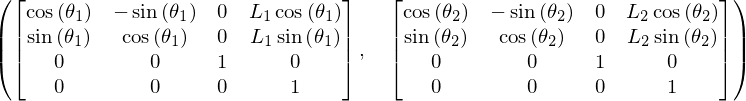

In [10]:
A1 = dh(L1,0,0,t1)
A2 = dh(L2,0,0,t2)
A1, A2

Y finalmente efectuamos la multiplicación matricial para calcular $T_2^0$

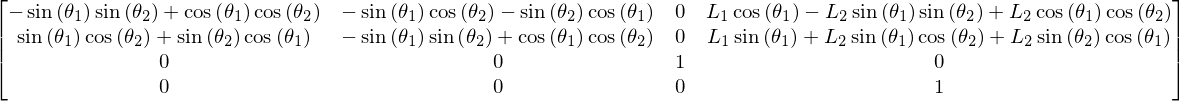

In [15]:
T20 = A1*A2
T20

¿Podemos simplificar? ¡Claro!, usando `simplify`:

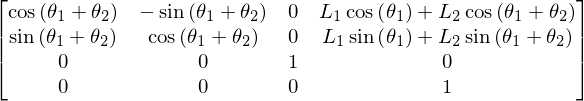

In [19]:
simplify( T20 )

> Hay que tener cierto cuidado con `simplify`, tal como se hizo en linea anterior lo único que hace es devolver la matriz simplificada pero sin afectar el valor guardado en T20; si requiere modificar el valor de la variable debería utilizarse el método, es decir: `T20.simplify()`

Para determinar la posición y orientación del extremo para ciertos valores de las variables articulares ($\theta_1$, $\theta_2$) simplemente se podrían hacer las sustituciones correspondientes.

Vamos a suponer que las dimensiones del manipulador son $L_1 = L_2 = 200$ mm, y que se requiere calcular la posición $(x,y)$ del extremo cuando $ \theta_1 = 90° $ y $ \theta_2 = -90° $, entonces:

T20.subs({L1: 200, L2:200, t1:pi/2, t2:-pi/2})

Se puede verificar por inspección que esto corresponde con la posición esperable para el extremo.

Adicionalmente podemos, también, visualizar el esquemático del manipulador para ciertos valores articulares dados. En el caso de este manipulador RR nos bastaría con conocer la información correspondiente a la posición del origen de cada sistema {0}, {1} y {2}. Esta información está contenida en las matrices de transformación $T_1^0$ y $T_2^0$, naturalmente en el caso del origen de {0} su posición será justamente el origen de coordenadas.

Calculamos entonces la posición de cada origen:

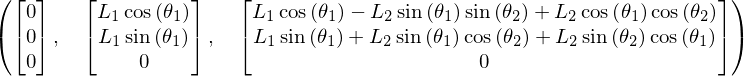

In [22]:
O0 = Matrix([0,0,0])
O1 = A1[:3,3]
O2 = T20[:3,3]
O0,O1,O2

Ahora trazaremos líneas entre estos puntos que *emulen* a cada eslabón, para ello debemos importar la librería **Matplotlib**.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Definimos los datos o valores numéricos a utilizar como un diccionario y procedemos a graficar:

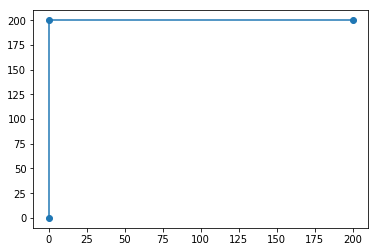

In [42]:
datos = {L1:200, L2:200, t1:pi/2, t2:-pi/2}
x,y,z = list( zip(O0.subs(datos), O1.subs(datos), O2.subs(datos)) )
plt.plot(x, y, "-o");

¿Y para múltiples valores?, ¡Un bucle! (o una expresión vectorizada).

Por ejemplo, variemos $\theta_1$:

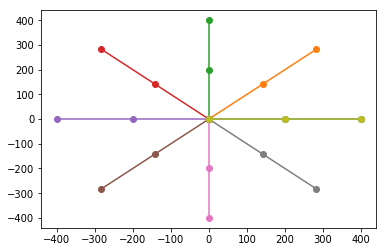

In [44]:
for T1 in [0, pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 7*pi/4, 2*pi]:
    datos = {L1:200, L2:200, t1:T1, t2:0}
    x,y,z = list( zip(O0.subs(datos), O1.subs(datos), O2.subs(datos)) )
    plt.plot(x, y, "-o");

Y para muchos, muchos, valores, sería más conveniente utilizar **NumPy**. Por ejemplo, variando ambos valores articulares:

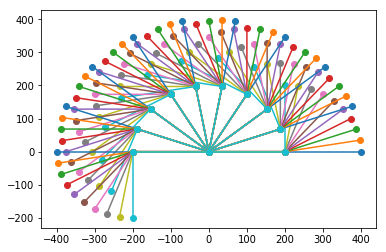

In [51]:
import numpy as np

for T1 in np.linspace(0, np.pi, 10):
    for T2 in np.linspace(0, np.pi/2, 10):
        datos = {L1:200, L2:200, t1:T1, t2:T2}
        x,y,z = list( zip(O0.subs(datos), O1.subs(datos), O2.subs(datos)) )
        plt.plot(x, y, "-o");